# Proyecto Reto, El Arte de la Analitica

* Gael González Arbesú - A01611800
* Brandon Kevin Saavedra Cortes- A01748300 

# Descripción del objetivo:

Mediante la implementación de código en python y el uso de la ánalitica estaremos desarrollando un ánalisis mediante el cual buscaremos tendencias y patrones dentro de la base de datos recabada y los usuarios

In [140]:
#Importamos los datos y librerias:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

datos = pd.read_csv("covid19_tweets.csv")
datos #Imprimimos los datos para observar que se hayan cargado adecuadamente

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74431,Laura Wolfrom,"Lexington, KY",The only things I collect are memories.,2010-09-24 02:01:15,85,586,1902,False,2020-08-04 03:13:29,So far this summer I have filled up my lawn mo...,"['COVID19', 'QuarantineLife']",Twitter for iPhone,False
74432,Professor Tonya M. Evans,😷 #stayathome,Law Prof @DickinsonLaw & Entrepreneur | Crypto...,2013-05-14 20:15:24,4289,1066,53569,False,2020-08-04 03:13:26,"ICYMI: REPLAY: #TechIntersect🧩 #16: Isaiah ""@B...","['TechIntersect', 'Bitcoin', 'COVID19']",Twitter Web App,False
74433,People's Daily app,"北京, 中华人民共和国",Our mission is to provide news and perspective...,2018-02-04 12:36:42,1413,102,16,False,2020-08-04 03:13:22,Community workers in Tianshan District of Urum...,"['China', 'Xinjiang']",Twitter Web App,False
74434,M0ser,NaN,Reagan conservative and attorney raised in the...,2014-02-18 03:46:28,2554,1733,129104,False,2020-08-04 03:13:19,If only we had a responsible media to warn us ...,['COVID19'],Twitter for iPhone,False


Primeramente destacaremos los tipos a los que pertenecen cada grupo de datos esto pues no podemos manejar todos los datos de las mismas maneras.

In [128]:
tipos = datos.dtypes
tipos

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

Con esto destacado podemos observar los tipos de variables que tenemos como fue hecho en una actividad de la clase, esto lo aplicamos para destacar como se manejaran cada tipos de grupos

# Tendencias en los mensajes

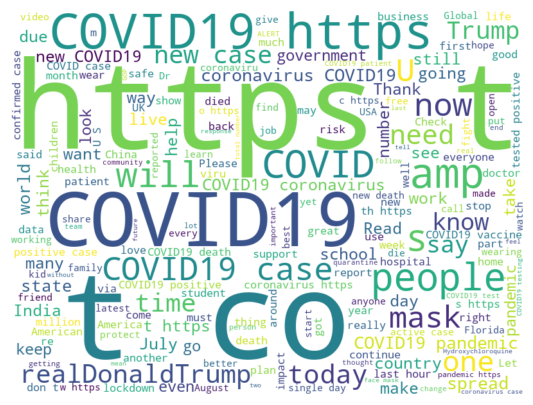

In [141]:
# Concatenar todos los textos en una sola cadena
text_data = ' '.join(datos['text'])
# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=600, background_color='white').generate(text_data)
# Mostrar el Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Se utilizo la librería wordcloud que genera mediante una recopilación de las palabras más utilizadas una imagen a modo de conjunto de palabras, se utilizo la columna "text" para la implementación de la misma

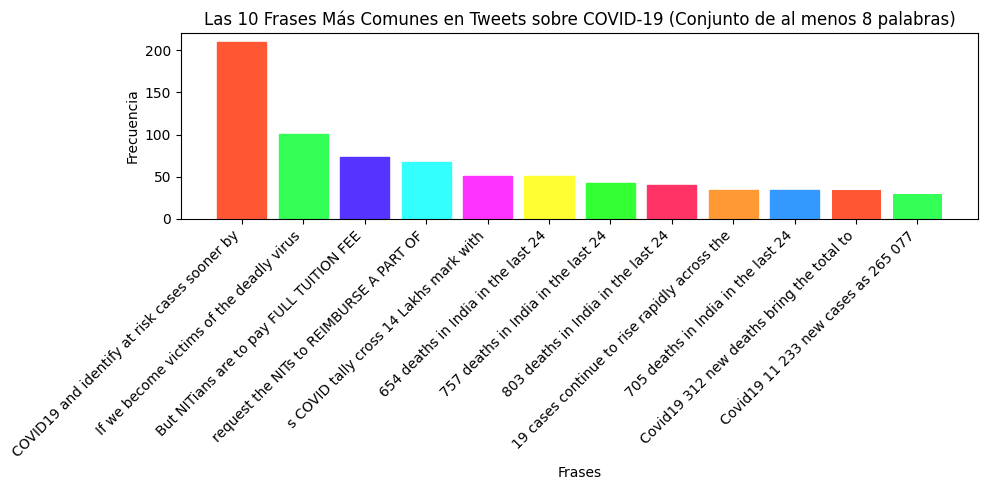

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_csv('covid19_tweets.csv')

# Concatenar todos los textos en una sola cadena
text_data = ' '.join(df['text'])

# Tokenizar el texto en frases (conjuntos de al menos 8 palabras)
phrases = re.findall(r'\b\w+\s+\w+\s+\w+\s+\w+\s+\w+\s+\w+\s+\w+\s+\w+\w+\b', text_data)

# Contar la frecuencia de las frases
phrase_freq = Counter(phrases)

# Obtener las 10 frases más comunes
top_phrases = phrase_freq.most_common(12)

# Crear un diccionario con las frases y sus frecuencias
phrase_dict = dict(top_phrases)

# Paleta de colores personalizada
colores = ['#FF5733', '#33FF57', '#5733FF', '#33FFFF', '#FF33FF', '#FFFF33', '#33FF33', '#FF3366', '#FF9933', '#3399FF']

# Crear una gráfica de barras de las 10 frases más comunes con colores diferentes
plt.figure(figsize=(10, 5))
bars = plt.bar(phrase_dict.keys(), phrase_dict.values(), color=colores)
plt.xlabel('Frases')
plt.ylabel('Frecuencia')
plt.title('Las 10 Frases Más Comunes en Tweets sobre COVID-19 (Conjunto de al menos 8 palabras)')
plt.xticks(rotation=45, ha='right', fontsize=10)

# Agregar etiquetas de color a las barras
for bar, color in zip(bars, colores):
    bar.set_color(color)

plt.tight_layout()
plt.show()


* Con este análisis realizado podemos destacar las frases más repetidas y visualmente mediante la frecuencia destacar cuantas veces se repitieron dichas frases, con esto podemos observar comportamientos en los tweets realizados y ver las tendencias que más fueron comentadas, cabe destacar que se comparan 8 palabras que se repitieran y en base a eso realiza un histograma, fueron elegidas 8 palabras porque de ser menos es más dificil entender el mensaje y de ser más palabras se reduce drasticamente el analisis que se busca implementar.
* Comparando con el excel vemos que ninguno de los mensajes fue un retweet, es importante destacar esto pues de haber sido retweets, se estarían repitiendo los textos y las palabras se verían repetidas por dicha razón, pero como esto no ocurre, podemos decir que cada mensaje si es de un usuario diferente.

Source:

In [131]:
conteo_source = datos["source"].value_counts()
print(conteo_source)

source
Twitter Web App               22974
Twitter for Android           16758
Twitter for iPhone            15824
TweetDeck                      3453
Hootsuite Inc.                 2846
                              ...  
Post to Social by SHIFT1          1
PRNewswire                        1
Hep Auto Tweet                    1
Chorus publishing platform        1
Tweecha Lite                      1
Name: count, Length: 450, dtype: int64


c:\Users\pinki\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pinki\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pinki\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


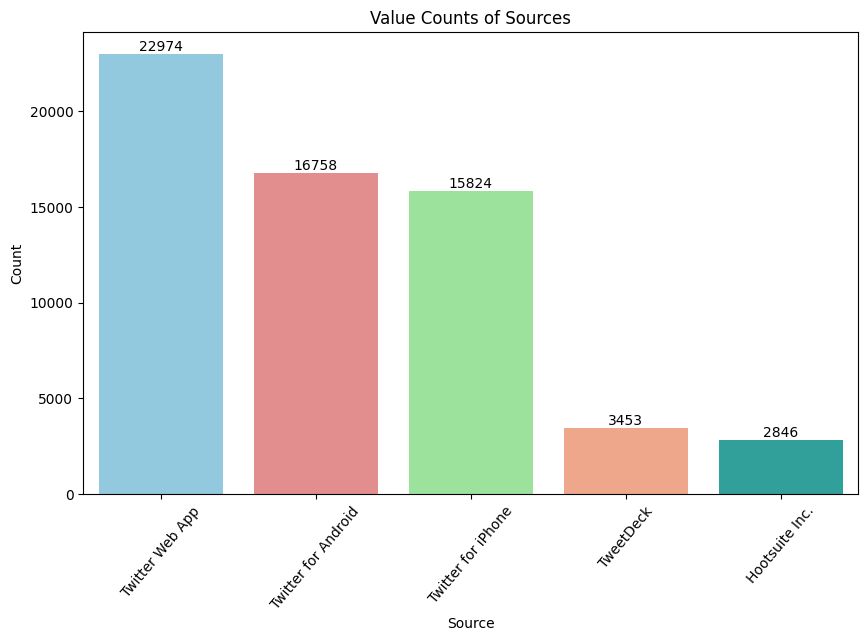

In [138]:
data = {
    "source": ["Twitter Web App"] * 22974
    + ["Twitter for Android"] * 16758
    + ["Twitter for iPhone"] * 15824
    + ["TweetDeck"] * 3453
    + ["Hootsuite Inc."] * 2846
}
datos = pd.DataFrame(data)

value_counts = datos["source"].value_counts().reset_index()
value_counts.columns = ["Source", "Count"]
custom_colors = ["skyblue", "lightcoral", "lightgreen", "lightsalmon", "lightseagreen"]

plt.figure(figsize=(10, 6))
sns.barplot(data=value_counts, x="Source", y="Count", palette=custom_colors)
plt.title("Value Counts of Sources")

for index, row in value_counts.iterrows():
    plt.text(index, row["Count"], str(row["Count"]), ha="center", va="bottom")

plt.xticks(rotation=50)
plt.show()

Primeramente se hizo un conteo del grupo de datos source donde se destacan los distintos medios por los cuales se realizaron los tweets, despues los graficamos mediante un histograma, la función de esto es primeramente

# Analisis de datos

ánalisis de seguidores, amigos y favoritos

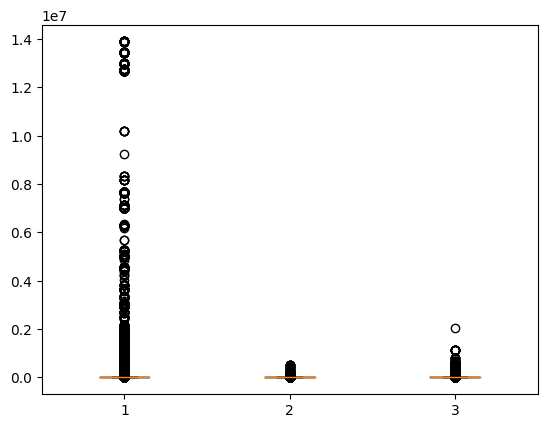

In [136]:
plt.boxplot(datos[["user_followers","user_friends","user_favourites"]])
plt.show()

Realizamos el previo diagrama retomado de las actividades anteriores para destacar cual de los tres grupos de datos es el más grande o el que mayor destaca, esto con el fin de ver cual de los grupos es el más influyente y representativo, aunque si bien cada uno abarca aspectos diferentes y se entiende que por mismas razones los datos varían nos servira para el desarrollo del analisis.

In [137]:
numericData = datos.select_dtypes(include = ["int"])
numericData.describe()

,user_followers,user_friends,user_favourites
count,7.443600e+04,74436.000000,7.443600e+04
mean,1.059513e+05,2154.721170,1.529747e+04
std,8.222900e+05,9365.587474,4.668971e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.660000e+02,153.000000,2.200000e+02
50%,9.600000e+02,552.000000,1.927000e+03
75%,5.148000e+03,1780.250000,1.014800e+04
max,1.389284e+07,497363.000000,2.047197e+06


* De este analisis estadistico rapido queremos destacar más que nada el máximo y los percentiles pues estos nos indican la distribución de los elementos como el caso de los favoritos que por ejemplo, el 25% de los usuarios tienen menos de 220 elementos favoritos, el 50% tienen menos de 1,927 elementos favoritos (mediana), y el 75% tienen menos de 10,148 elementos favoritos. El valor máximo es relativamente alto, alrededor de 2,047,197.
* No tomamos muy en cuenta elementos como el promedio pues al ser elementos muy dispersos pierde mucha precision.

In [ ]:
co_datos_std = datos.groupby('user_location').agg({'user_followers' : 'std'}).sort_values('user_followers',ascending = False)
co_datos_mn = datos.groupby('user_location').agg({'user_followers' : 'mean'}).sort_values('user_followers',ascending = False)
co_datos_mdn = datos.groupby('user_location').agg({'user_followers' : 'median'}).sort_values('user_followers', ascending = False)

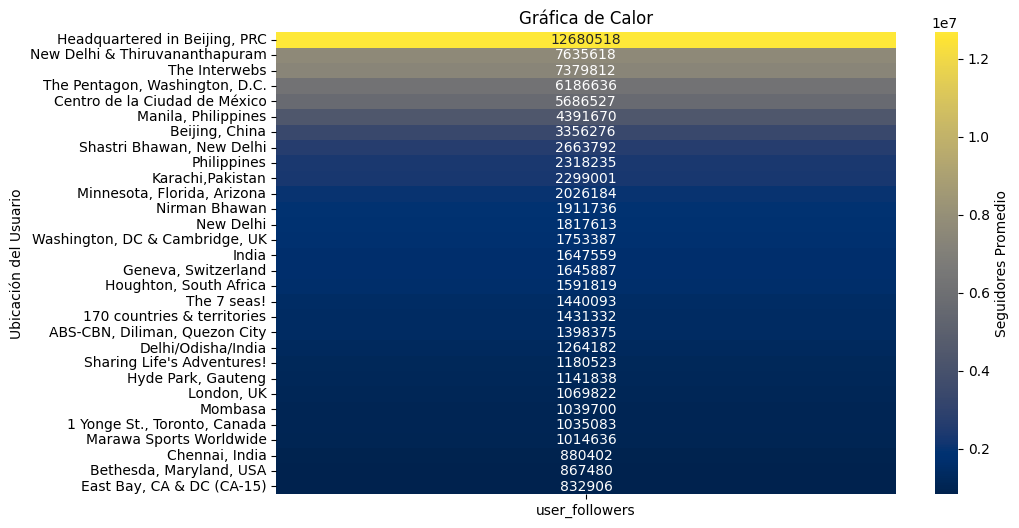

In [ ]:

plt.figure(figsize=(10, 6))
sns.heatmap(co_datos_mn.head(30), cmap='cividis', annot=True, fmt='.0f', cbar_kws={'label': 'Seguidores Promedio'})
plt.ylabel('Ubicación del Usuario')
plt.title('Gráfica de Calor')
plt.show()

El resultado muestra las ubicaciones de usuarios (columna "user_location") con las estadísticas correspondientes para "user_followers". Por ejemplo, la primera fila indica que la ubicación "Headquartered in Beijing, PRC" tiene la mayor desviación estándar en términos de seguidores de usuarios, lo que podría indicar una variabilidad significativa en la cantidad de seguidores entre los usuarios que tienen esta ubicación en sus perfiles. Las siguientes filas muestran otras ubicaciones con sus respectivas estadísticas de seguidores.

Mediante esta gráfica de calor tenemos una representación visual de la distribución de seguidores promedio en función de la ubicación de los usuarios. Esto nos permite identificar rápidamente ubicaciones con altos promedio de seguidores (celdas más oscuras) y ubicaciones con promedios más bajo de seguidores (celdas más claras). Esto puede ser útil para identificar ubicaciones geográficas específicas que tienen una base de seguidores más grande en comparación con otras. Aunque hay ubicaciones como "sharing Life's Adventures!" o "The 7 seas!" que podrían ser no tomadas en cuenta al no ser ubicaciones reales. esto nos da precisión para identificar las zonas geograficas con más actividad en la aplicación y de donde podrían ser provenientes la mayor cantidad de tweets